nan nan nan
[ 9.4  8.3  8.9  8.3 10.  10.6  7.2  7.2  7.8  6.1  5.6  6.1  5.   3.9
  4.4  2.8  5.   3.9  5.6  7.2  7.2  8.9  5.6  6.7  3.3  5.6  3.3  3.3
  3.3  3.9  5.   5.   6.1  nan  7.2 13.9 11.1  5.6  2.2  3.9  6.1  3.3
  5.6  6.1  2.8  2.8  4.4  7.8 10.   9.4  5.6  5.6  7.8  5.   3.9  6.7
  7.2  7.8  6.7  5.   5.6  8.3  9.4 10.   9.4 10.   8.9 10.6  6.1  8.9
  8.3  7.2  7.8 10.  10.   7.8 10.6 13.3 14.4 10.6 11.7 11.1  9.4 10.
 12.2 10.  11.1 12.8 12.8 12.8 12.2 11.1 10.6  8.3  8.3  6.1  7.2  3.3
 16.1  3.9  8.9  7.8  6.7  7.2  7.2  9.4  9.4 12.2 11.1  8.9  6.1  7.2
 10.  10.  16.1 12.2 12.8 11.7  nan 11.1 11.7 12.2 11.1 10.6 11.1 12.2
 13.3 15.6 16.1 14.4 13.3 13.9 13.3 10.6 13.3 13.9 14.4 15.   nan 11.1
 14.4 15.  15.6 15.  15.6 16.7 14.4 14.4 12.8 13.9 15.  16.1 15.  14.4
 13.3 12.8 13.9 15.  15.6 15.6 15.6  nan 14.4  nan  nan  nan 13.3 14.4
 16.1 16.1 16.7 17.2 18.9  nan 15.  15.6 15.6 15.  15.6 16.1 15.6 17.2
 18.3 20.  21.1 20.  18.9 17.8 16.7 15.  13.9 12.8 12.2 14.4 14.4 

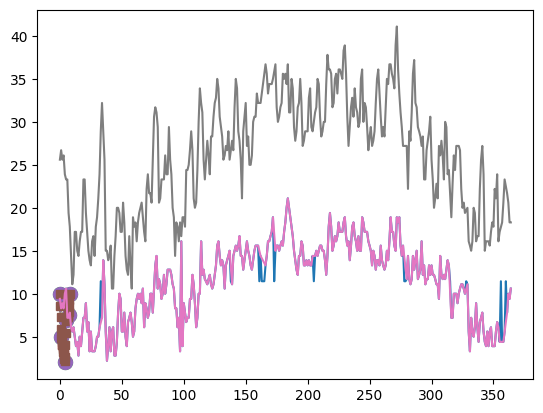

In [12]:
# Imports
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

# Enables inline plotting in Jupyter
%matplotlib inline

# Import custom module for weather data (assuming it's defined elsewhere)
import getweather

# Load weather data for Pasadena in 2001
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

# Check statistics of TMIN
print(np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN']))

# Display TMIN values
print(pasadena['TMIN'])

# Check how NaN behaves with arithmetic operations
print(np.nan + 1)

# Identify NaN values in TMIN
print(np.isnan(pasadena['TMIN']))

# Boolean arithmetic with True/False
print(False + True + True)

# Count the number of NaN values in TMIN
print(np.sum(np.isnan(pasadena['TMIN'])))

# Min/Max values ignoring NaN
print(np.nanmin(pasadena['TMIN']), np.nanmax(pasadena['TMAX']))

# Replace NaN values with the mean for TMIN and TMAX
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN'])
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX'])

# Display the updated TMIN
print(pasadena['TMIN'])

# Plot TMIN values
pp.plot(pasadena['TMIN'])

# Sample x and y data for interpolation
xdata = np.array([0, 1, 4, 5, 7, 8], 'd')
ydata = np.array([10, 5, 2, 7, 7.5, 10], 'd')

# Plot x/y data
pp.plot(xdata, ydata, '--o')

# Interpolate x/y data with missing values to continuous x values
xnew = np.linspace(0, 8, 9)
ynew = np.interp(xnew, xdata, ydata)

# Plot interpolated data
pp.plot(xdata, ydata, '--o', ms=10)
pp.plot(xnew, ynew, 's')

# Interpolate x/y data to denser x values
xnew_dense = np.linspace(0, 8, 30)
ynew_dense = np.interp(xnew_dense, xdata, ydata)

# Plot dense interpolated data
pp.plot(xdata, ydata, '--o', ms=10)
pp.plot(xnew_dense, ynew_dense, 's')

# Reload Pasadena data
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

# Build a mask of "good" (non-NaN) values and interpolate
good = ~np.isnan(pasadena['TMIN'])
x = np.arange(0, 365)
interpolated_tmin = np.interp(x, x[good], pasadena['TMIN'][good])

# Function to fill NaNs by interpolation
def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))
    return np.interp(x, x[good], array[good])

# Plot interpolated TMIN and TMAX
pp.plot(fillnans(pasadena['TMIN']))
pp.plot(fillnans(pasadena['TMAX']))
